In [26]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
from sklearn.model_selection import train_test_split

In [2]:
IMAGE_SHAPE=(224,224)

classifier=tf.keras.Sequential([
    hub.KerasLayer('https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-classification/versions/4', input_shape=IMAGE_SHAPE+(3,))
])

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [4]:
dataset_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='c:\data\myimages',untar=True)

In [5]:
data_dir

'c:\\data\\myimages\\datasets\\flower_photos'

In [6]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('c:/data/myimages/datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('c:/data/myimages/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [8]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

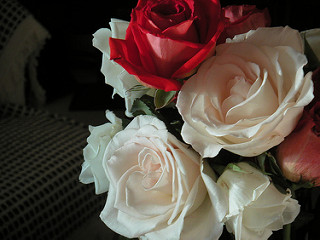

In [10]:
Image.open(str(roses[1]))

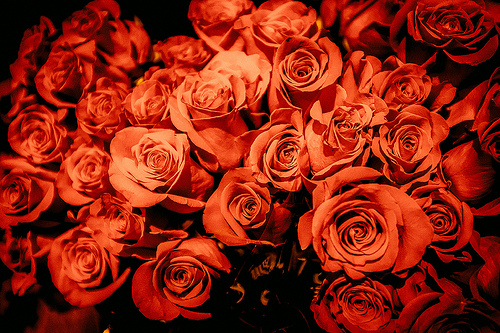

In [11]:
Image.open(str(roses[2]))

In [12]:
tulips=list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('c:/data/myimages/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

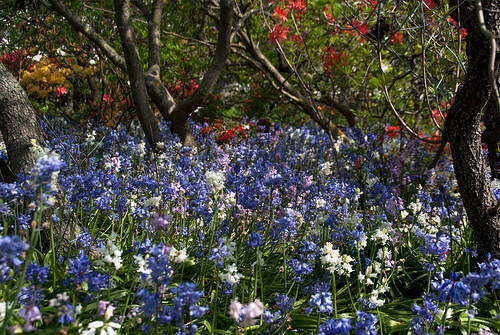

In [13]:
Image.open(str(tulips[1]))

In [14]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [15]:
flowers_images_dict['roses'][:5]

[WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [16]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [17]:
str(flowers_images_dict['roses'][0])

'c:\\data\\myimages\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [18]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [19]:
img.shape

(240, 179, 3)

In [20]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [21]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [22]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [23]:
X[0]/255

array([[[0.        , 0.05882353, 0.02352941],
        [0.        , 0.05882353, 0.02352941],
        [0.        , 0.0627451 , 0.02745098],
        ...,
        [0.09411765, 0.2       , 0.12156863],
        [0.09803922, 0.20392157, 0.1254902 ],
        [0.10196078, 0.20784314, 0.12941176]],

       [[0.03137255, 0.08627451, 0.05490196],
        [0.03137255, 0.08627451, 0.05490196],
        [0.02745098, 0.08235294, 0.05490196],
        ...,
        [0.08235294, 0.18431373, 0.12156863],
        [0.09411765, 0.19215686, 0.13333333],
        [0.09803922, 0.2       , 0.1372549 ]],

       [[0.04705882, 0.08627451, 0.05882353],
        [0.04705882, 0.08627451, 0.05882353],
        [0.04313725, 0.08627451, 0.05490196],
        ...,
        [0.08235294, 0.16862745, 0.12156863],
        [0.09411765, 0.18039216, 0.12941176],
        [0.10196078, 0.18823529, 0.14117647]],

       ...,

       [[0.06666667, 0.11372549, 0.09803922],
        [0.05490196, 0.09803922, 0.07843137],
        [0.05098039, 0

In [24]:
X=np.array(X)
y=np.array(y)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [28]:
X_train_scaled=X_train/255

In [29]:
X_test_scaled=X_test/255

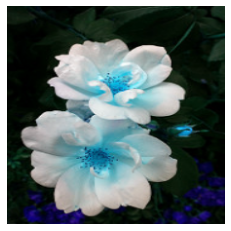

In [30]:
plt.axis('off')
plt.imshow(X[0])

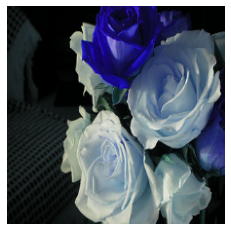

In [31]:
plt.axis('off')
plt.imshow(X[1])

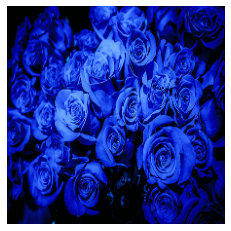

In [32]:
plt.axis('off')
plt.imshow(X[2])

In [34]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))
predicted=np.argmax(predicted,axis=1)
predicted

1/1 [==============================] - 8s 8s/step


array([795, 880, 795], dtype=int64)

In [35]:
feature_extractor_model='https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/tf2-preview-feature-vector/versions/4'
pretrained_model_without_top_layer=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False)

In [36]:
num_of_flowers=5

model=tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 135s 1s/step - loss: 0.7773 - acc: 0.7049
Epoch 2/5
86/86 [==============================] - 86s 1s/step - loss: 0.3991 - acc: 0.8619
Epoch 3/5
86/86 [==============================] - 86s 999ms/step - loss: 0.3240 - acc: 0.8928
Epoch 4/5
86/86 [==============================] - 87s 1s/step - loss: 0.2654 - acc: 0.9142
Epoch 5/5
86/86 [==============================] - 87s 1s/step - loss: 0.2280 - acc: 0.9320


In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 33s 987ms/step - loss: 0.3614 - acc: 0.8638


[0.36140087246894836, 0.8638344407081604]